Extract text and table from pdf file in sequence as on pdf page line by line
Using pdfplumber. 

In [15]:
import json
import pdfplumber
import pandas as pd 

In [16]:
print(pdfplumber.__version__)

0.11.0


In [17]:
pdf = pdfplumber.open("15.pdf")
p0 = pdf.pages[0]
im = p0.to_image()

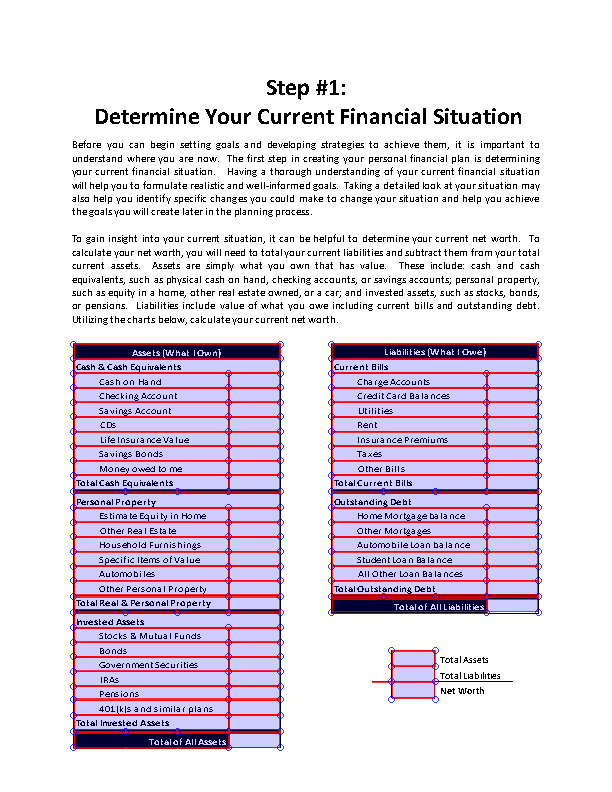

In [18]:
im.debug_tablefinder()

In [19]:
images=p0.images
for image_index, image in enumerate(images):
    print(image)
    x0, y0, x1, y1 = image["x0"], image["y0"],(image["x0"]+ image["height"]),(image["y0"]+ image["width"])
    cropped_image = p0.crop((x0, y0, x1, y1)).to_image()


In [20]:
def is_text_inside_table(normal_text_coords, table_text_coords):
    # Define the bounding box for the normal text
    normal_text_bbox = (normal_text_coords['x0'], normal_text_coords['top'],
                        normal_text_coords['x1'], normal_text_coords['bottom'])

    # Define the bounding box for the table text
    table_text_bbox = (table_text_coords[0], table_text_coords[1],
                       table_text_coords[2], table_text_coords[3])
 
    return normal_text_bbox[1] < table_text_bbox[3] and normal_text_bbox[1] > table_text_bbox[1] and normal_text_bbox[0] < table_text_bbox[2]

In [21]:

pdf_path='15.pdf'
pdf = pdfplumber.open(pdf_path)
text_inSequence=[]

for page in pdf.pages:
    # if(page.page_number!=4):
    #     continue
    elements = page.extract_text_lines(x0=0, y0=0, x1=page.width, y1=page.height)
    tbls_location=page.find_tables()
    tbls=page.extract_tables()
    print(len(tbls_location))
    
    table_added=0
    is_table_added_1=False
    is_table_added_2=False
    is_table_added_3=False
    is_table_added_4=False
    for element in elements:
        if len(tbls_location) == 0:
            text_inSequence.append(element['text'])
            #print('all tables added')
            print(len(tbls_location) == 0) 
            print(is_table_added_2 and is_table_added_1 and is_table_added_3 and is_table_added_4)
            continue
        is_inside_2=False
        is_inside_3=False
        is_inside_4=False

        is_inside_1=is_text_inside_table(element, tbls_location[0].bbox)
        if not is_inside_1 and len(tbls_location) > 1:
            is_inside_2=is_text_inside_table(element, tbls_location[1].bbox)
        if not is_inside_1 and not is_inside_2 and len(tbls_location) > 2:
            is_inside_3=is_text_inside_table(element, tbls_location[2].bbox)
        if not is_inside_1 and not is_inside_2 and not is_inside_3 and len(tbls_location) > 3:
            is_inside_4=is_text_inside_table(element, tbls_location[3].bbox)

        if is_inside_1 and not is_table_added_1:
            text_inSequence.append(json.dumps(tbls[0]))
            is_table_added_1=True
            continue
        if is_inside_2 and not is_table_added_2:
            text_inSequence.append(json.dumps(tbls[1]))
            is_table_added_2=True
            continue
        if is_inside_3 and not is_table_added_3:
            text_inSequence.append(json.dumps(tbls[2]))
            is_table_added_3=True
            continue
        if is_inside_4 and not is_table_added_4:
            text_inSequence.append(json.dumps(tbls[3]))
            is_table_added_4=True
            continue
        text_add_Or_not=(not is_inside_1 and not is_inside_2 and not is_inside_3 and not is_inside_3) or (is_table_added_1 and is_table_added_2 and is_table_added_3 and is_table_added_4)        
        if  text_add_Or_not:
            text_inSequence.append(element['text'])
    print(is_inside_1,is_inside_2,is_inside_3,is_table_added_4)
    for text_table in text_inSequence:
        print(text_table)

3
True False False False
Step #1:
Determine Your Current Financial Situation
Before you can begin setting goals and developing strategies to achieve them, it is important to
understand where you are now. The first step in creating your personal financial plan is determining
your current financial situation. Having a thorough understanding of your current financial situation
will help you to formulate realistic and well-informed goals. Taking a detailed look at your situation may
also help you identify specific changes you could make to change your situation and help you achieve
the goals you will create later in the planning process.
To gain insight into your current situation, it can be helpful to determine your current net worth. To
calculate your net worth, you will need to total your current liabilities and subtract them from your total
current assets. Assets are simply what you own that has value. These include: cash and cash
equivalents, such as physical cash on hand, checking ac